In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
mall_kmeans = pd.read_csv('mall_kmeans.csv')

In [3]:
mall_kmeans.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
mall_kmeans = mall_kmeans.drop(['CustomerID'], axis=1)

In [5]:
mall_kmeans.shape

(200, 4)

In [6]:
mall_kmeans.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
mall_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [8]:
mall_kmeans.Genre.value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

In [9]:
mall_kmeans.Genre.replace({'Female':1,'Male':0}, inplace=True)

In [10]:
mall_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Genre                   200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [11]:
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans()

In [13]:
ssd = []

for k in range(1,11):
    kmeans = KMeans(k)
    kmeans.fit(mall_kmeans)
    ssd.append(kmeans.fit(mall_kmeans).score(mall_kmeans))

D:\Software\Anaconda\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Software\Anaconda\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Software\Anaconda\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Software\Anaconda\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Wind

D:\Software\Anaconda\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Software\Anaconda\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
ssd = np.round(ssd)
ssd

array([-308862., -212889., -143392., -104415.,  -75413.,  -58349.,
        -51573.,  -44390.,  -40621.,  -37436.])

In [15]:
new_ssd = np.abs(ssd)
new_ssd

array([308862., 212889., 143392., 104415.,  75413.,  58349.,  51573.,
        44390.,  40621.,  37436.])

In [16]:
k = list(range(1,11))

# Elbow Plot

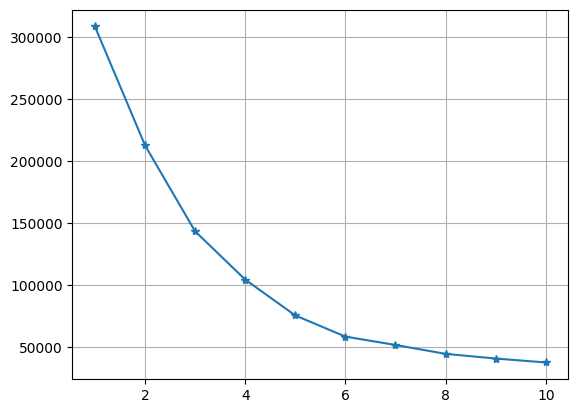

In [17]:
plt.plot(k, new_ssd, marker='*')
plt.grid()

In [18]:
kmeans = KMeans(n_clusters=5)

In [19]:
kmeans.fit(mall_kmeans)

D:\Software\Anaconda\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Software\Anaconda\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [20]:
kmeans.labels_

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [21]:
len(kmeans.labels_)

200

In [22]:
kmeans.cluster_centers_

array([[ 0.53846154, 32.69230769, 86.53846154, 82.12820513],
       [ 0.5875    , 42.9375    , 55.0875    , 49.7125    ],
       [ 0.47222222, 40.66666667, 87.75      , 17.58333333],
       [ 0.60869565, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.59090909, 25.27272727, 25.72727273, 79.36363636]])

In [23]:
mall_kmeans['Labels'] =  kmeans.labels_

In [24]:
mall_kmeans.head(10)

,Genre,Age,Annual Income (k$),Spending Score (1-100),Labels
0,0,19,15,39,3
1,0,21,15,81,4
2,1,20,16,6,3
3,1,23,16,77,4
4,1,31,17,40,3
5,1,22,17,76,4
6,1,35,18,6,3
7,1,23,18,94,4
8,0,64,19,3,3
9,1,30,19,72,4


In [25]:
mall_kmeans.Labels.value_counts()

Labels
1    80
0    39
2    36
3    23
4    22
Name: count, dtype: int64

In [26]:
from sklearn.cluster import AgglomerativeClustering

In [27]:
kmeans_agglo  = AgglomerativeClustering(n_clusters = 5)

In [28]:
label= kmeans_agglo.fit_predict(mall_kmeans)
label

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [29]:
mall_kmeans.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Labels'],
      dtype='object')

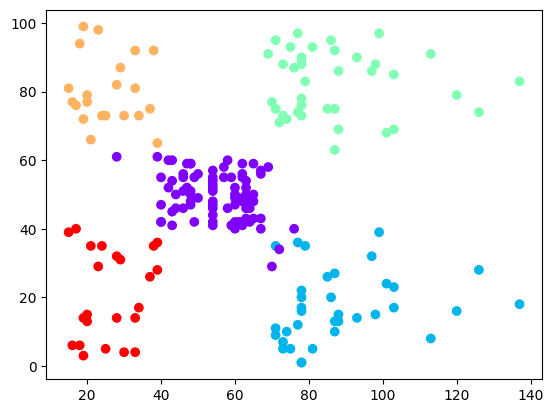

In [30]:
plt.scatter(mall_kmeans['Annual Income (k$)'], mall_kmeans['Spending Score (1-100)'], c=label, cmap='rainbow')